<a href="https://colab.research.google.com/github/mvkumar14/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/V1-LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


## Getting the data again

In [0]:
# Import the congressional voting records data
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

--2019-10-09 04:40:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-10-09 04:40:42 (286 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
import pandas as pd
import numpy as np

congress=pd.read_csv('house-votes-84.data',header=None,
                      names=['handicapped-infants','water-project',
                      'budget-resolution','physician-fee-freeze',
                      'el-salvador-aid','relegious-groups',
                      'anti-sat-test-ban','aid',
                      'mx-missile','immigration',
                      'synfuels-corp','education-spending',
                      'superfund','crime','exports','export-sa'])
congress.head()

,handicapped-infants,water-project,budget-resolution,physician-fee-freeze,el-salvador-aid,relegious-groups,anti-sat-test-ban,aid,mx-missile,immigration,synfuels-corp,education-spending,superfund,crime,exports,export-sa
republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
congress = congress.replace({'?':np.nan,'y':1,'n':0})
congress.head()


,handicapped-infants,water-project,budget-resolution,physician-fee-freeze,el-salvador-aid,relegious-groups,anti-sat-test-ban,aid,mx-missile,immigration,synfuels-corp,education-spending,superfund,crime,exports,export-sa
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
 print(congress.isnull().sum())

handicapped-infants      12
water-project            48
budget-resolution        11
physician-fee-freeze     11
el-salvador-aid          15
relegious-groups         11
anti-sat-test-ban        14
aid                      15
mx-missile               22
immigration               7
synfuels-corp            21
education-spending       31
superfund                25
crime                    17
exports                  28
export-sa               104
dtype: int64


In [0]:
reps = congress[(congress.index=='republican')]
reps.head()

,handicapped-infants,water-project,budget-resolution,physician-fee-freeze,el-salvador-aid,relegious-groups,anti-sat-test-ban,aid,mx-missile,immigration,synfuels-corp,education-spending,superfund,crime,exports,export-sa
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [0]:
dems = congress[(congress.index=='democrat')]
dems.head()

,handicapped-infants,water-project,budget-resolution,physician-fee-freeze,el-salvador-aid,relegious-groups,anti-sat-test-ban,aid,mx-missile,immigration,synfuels-corp,education-spending,superfund,crime,exports,export-sa
democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
reps['aid'].isnull().sum()

11

In [0]:
reps['aid'].describe()

count    157.000000
mean       0.152866
std        0.361010
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: aid, dtype: float64

## Confidence interval representation

Now lets ask a question. There are two types of questions I have asked for this dataset


In [0]:
#all the imports needed for the rest of the notebook:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Obtaining variables for Confidence Interval

In [0]:
data=reps['aid']
m = data.mean()


In [0]:
data.std()


0.3610100697427416

In [0]:
data.var()


0.13032827045565915

In [0]:
len(data)


168

In [0]:
data.isnull().sum()

11

In [0]:
len(data)-data.isnull().sum()

157

In [0]:
data.std()/((len(data)-data.isnull().sum())**0.5)

0.028811740182242362

In [0]:
#confirming that stderr is the same as what was calculated above:
sem = data.sem()

In [0]:
#The last piece is the t value which I'll get from stats.t
confidence = .99
stats.t.ppf((1+confidence)/2,(len(data)-data.isnull().sum()))

2.607506474075784

In [0]:
#plugging in the values that are calculated above by hand.
t = stats.t.ppf(0.995,157)
print(t)

2.607506474075784


### Confidence Interval calculation

In [0]:
#Now I have all the pieces to calcualte the error as follows:
print('range of the ',confidence, ' confidence interval is:')
print(m-t*sem,m+t*sem)

range of the  0.99  confidence interval is:
0.07773944298363018 0.22799304109280294


### Visualization of Confidence Interval

In [0]:
#This is a function to plot the gaussian standard normal distribution
from scipy.stats import norm

def gauss_plot_direct(my_mean,my_stdev,color = 'b',out =1,scale =1):
  lb = (my_mean-(my_stdev*out))
  ub = (my_mean+(my_stdev*out))
  x_axis = np.arange(lb,ub,0.01)
  plt.plot(x_axis,norm.pdf(x_axis,my_mean,my_stdev),color =color)
  return


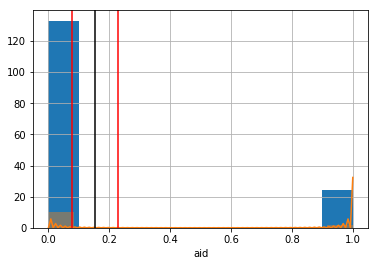

In [0]:
#lets plot that:
#Remember the data is reps['aid']

data.hist()
sns.distplot(data.dropna())
gauss_plot_direct(data.mean(),data.std(),out=1)
plt.axvline(m,color='black')
plt.axvline(m-t*sem,color='red')
plt.axvline(m+t*sem,color='red')


In [0]:
#altering the gauss_plot_direct for object plotting method
def gauss_plot_xy(my_mean,my_stdev,color = 'b',out =1,scale =1):
  lb = (my_mean-(my_stdev*out))
  ub = (my_mean+(my_stdev*out))
  x_axis = np.arange(lb,ub,0.01)
  return x_axis,norm.pdf(x_axis,my_mean,my_stdev)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


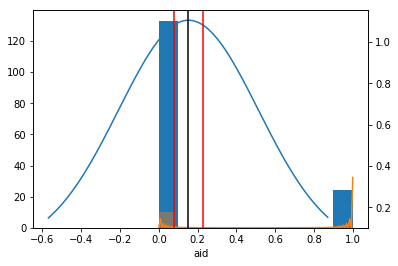

In [0]:
#this shows the distriubtion clearer, but there are 2 axes so it might be more
#unclear
fig, ax = plt.subplots();
ax.hist(data);
sns.distplot(data.dropna());

ax2 = ax.twinx();
a,b = gauss_plot_xy(data.mean(),data.std(),out=2)
ax2.plot(a,b);
plt.axvline(m,color='black');
plt.axvline(m-t*sem,color='red');
plt.axvline(m+t*sem,color='red');

Its hard to see the histogram on this axis. The historgram is a representation of the data using the gaussian distribution model. Due to the fact that there are over 30 data points this will be a close enough approximation to the t-distribution. The interpertaion of the confidence interval is that if this vote was held 100 time we would say that 95 of those times the value would fall within the two red bars.

### "Functionizing"

I should create the functions that were coded in class, as well as cleaning up my functions in this portion. Maybe try creating a few more visuals with the functions instead of manually.

In [0]:
#Now lets turn that process into a function
def confidence_interval(data,confidence=0.95):
  data.mean()

##Chi-squared test


### Importing Data:

In [0]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [0]:
contingency_table = pd.crosstab(df['sex'],df['class'],margins=True)
contingency_table

class,First,Second,Third,All
sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [0]:
#expected value calculation
row_sums = contingency_table.iloc[0:2,3].values
column_sums = contingency_table.iloc[2,0:3].values
print(row_sums)
print(column_sums)

[314 577]
[216 184 491]


In [0]:
total = contingency_table.iloc[2,3]
print(total)

891


In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in column_sums:
    expected_value = column*row_sums[i]/total
    expected_row.append(expected_value)
  expected.append(expected_row)

expected = np.array(expected)
expected

array([[ 76.12121212,  64.84399551, 173.03479237],
       [139.87878788, 119.15600449, 317.96520763]])

In [0]:
#Observed values:
observed = pd.crosstab(df['sex'],df['class']).values
observed

array([[ 94,  76, 144],
       [122, 108, 347]])

In [0]:
#Now that we have the values in array lets calculate 
# the reason we formatted as numpy arrays is because
#it allows 'broadcasting'

chi_squared = (((observed-expected)**2)/expected).sum()
print(chi_squared)


16.971499095517114


In [0]:
#With Scipy:
chi_squared,p_value,dof,expected =stats.chi2_contingency(observed)
print(chi_squared)

16.971499095517114


###Testing:

## Bonus Learnings:

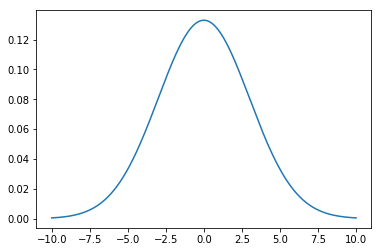

In [0]:
#how to plot a gaussian curve 
#obtained from https://stackoverflow.com/a/10138381

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-10, 10, 0.001)
my_mean = 0
my_stdev = 3 
plt.plot(x_axis, norm.pdf(x_axis,my_mean,my_stdev))
plt.show()

The second type is : How does x compared to y
a "relative" question. The null hypothesis is that they are the same

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)